<a href="https://colab.research.google.com/github/itstalmeez/Bite-wise-Internship/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import nltk
import os
import re

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from nltk import word_tokenize

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
pd.options.mode.chained_assignment = None

In [6]:
valid = pd.read_csv('/content/twitter_validation.csv')
train = pd.read_csv('/content/twitter_training.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
train.columns = ['id', 'information', 'type', 'text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
valid.columns = ['id', 'information', 'type', 'text']
valid.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [10]:
train_data = train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
valid_data = valid
valid_data

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
train_data['lower'] = train_data.text.str.lower()
train_data['lower'] = [str(data) for data in train_data.lower]
train_data['lower'] = train_data.lower.apply(lambda x: re.sub('^A-Za-z0-9', '', x))
valid_data['lower'] = train_data.text.str.lower()
valid_data["lower"]=[str(data) for data in valid_data.lower]
valid_data['lower'] = train_data.lower.apply(lambda x: re.sub('^A-Za-z0-9', '', x))


In [13]:
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


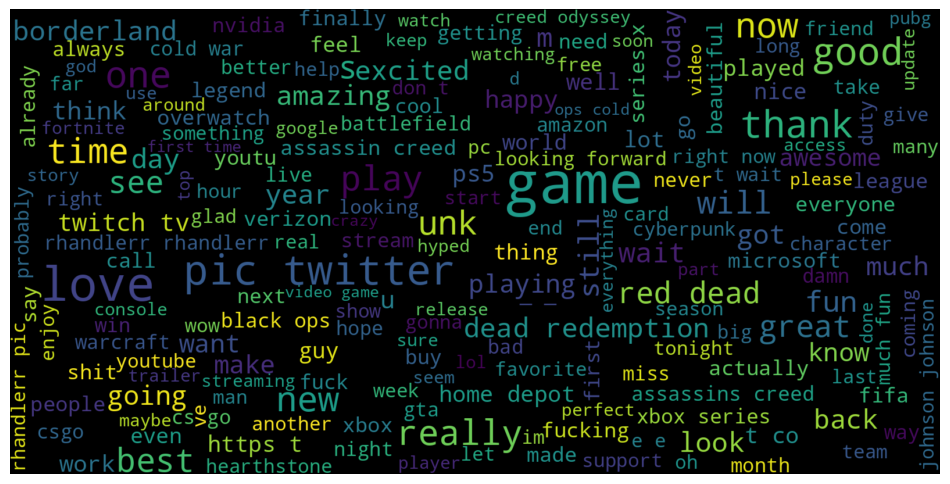

In [14]:
wordcloud_text =  ' '.join(train_data[train_data['type']=="Positive"].lower)

wordcloud = WordCloud(width=1600, height=800, max_font_size=100).generate(wordcloud_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

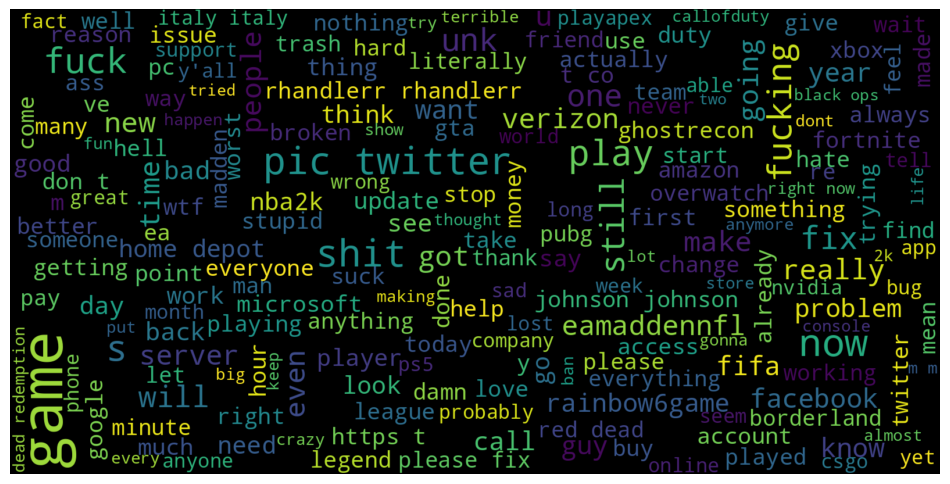

In [15]:
wordcloud_text =  ' '.join(train_data[train_data['type']=="Negative"].lower)
wordcloud = WordCloud(width=1600, height=800, max_font_size=100).generate(wordcloud_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

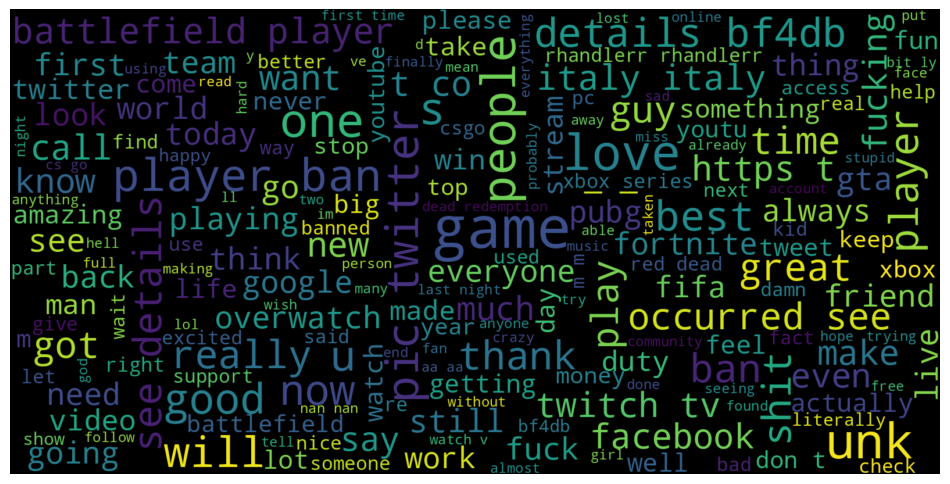

In [16]:
wordcloud_text =  ' '.join(train_data[train_data['type']=="Irrelevant"].lower)
wordcloud = WordCloud(width=1600, height=800, max_font_size=100).generate(wordcloud_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

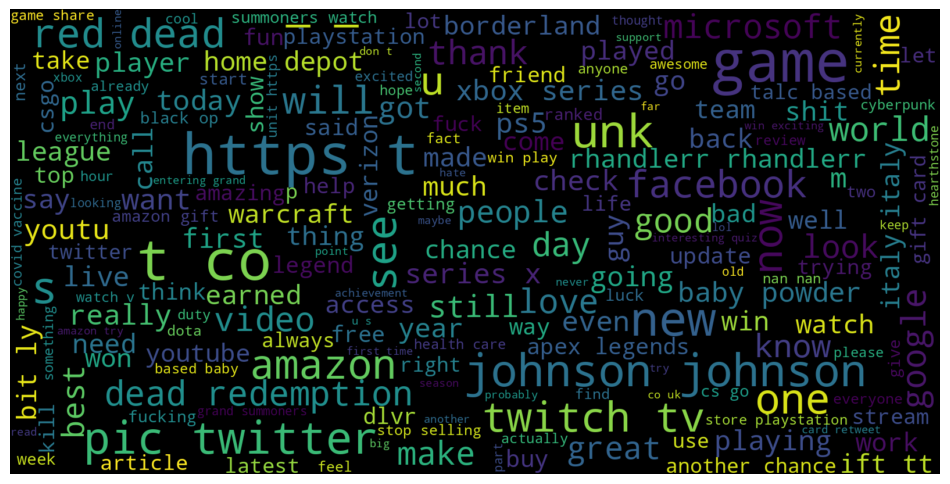

In [17]:
wordcloud_text =  ' '.join(train_data[train_data['type']=="Neutral"].lower)
wordcloud = WordCloud(width=1600, height=800, max_font_size=100).generate(wordcloud_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
plot1 = train_data.groupby(by=['information', 'type']).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


Text(0.5, 1.0, 'Distribution of tweets per Branch and Type')

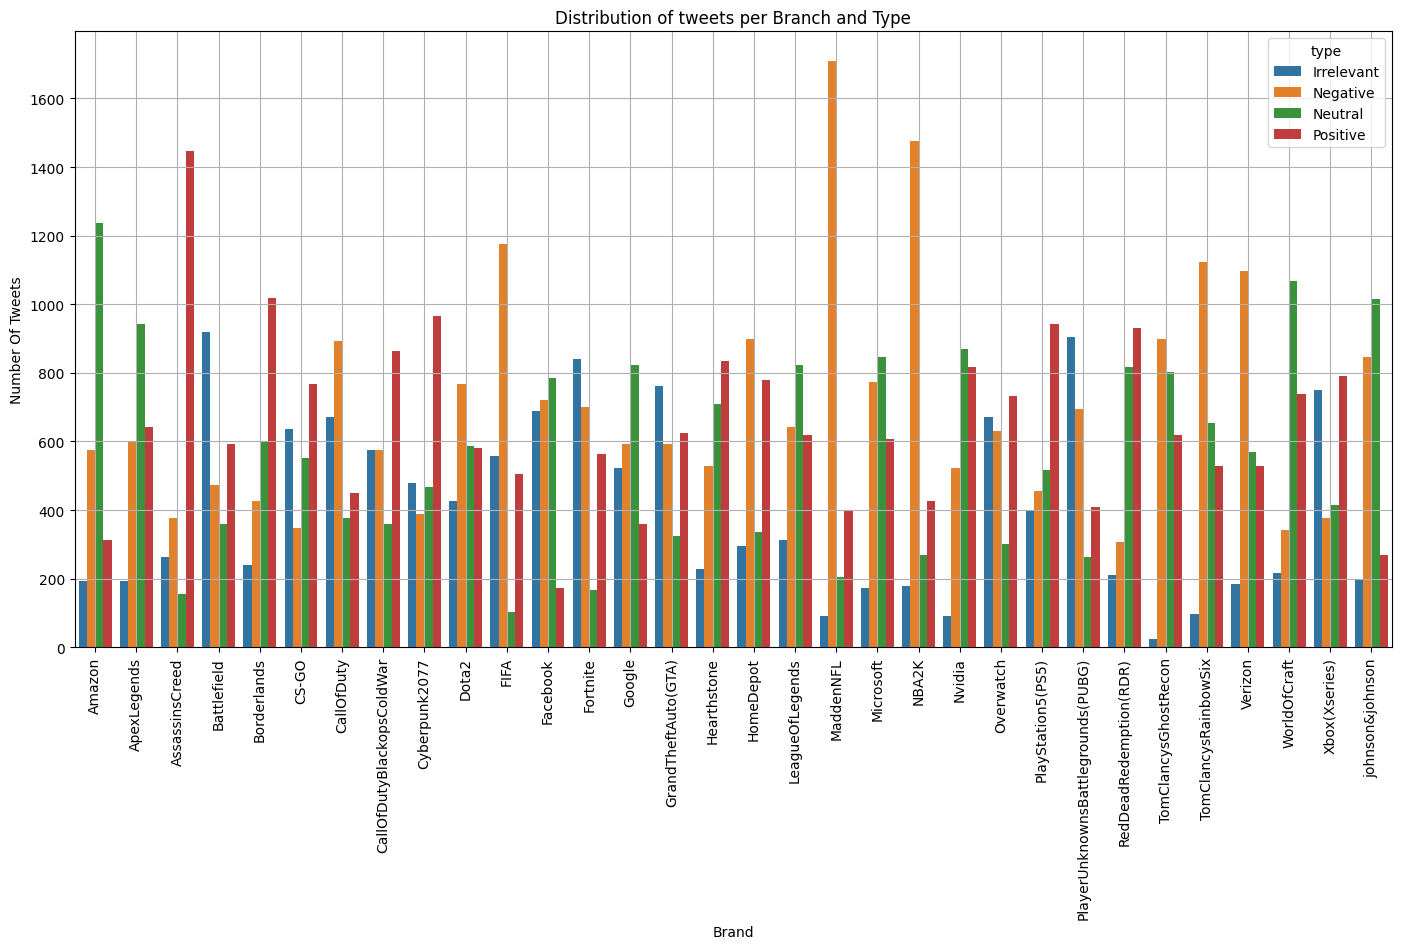

In [19]:
plt.figure(figsize=(17, 8))
sns.barplot(x='information', y='id', hue='type', data=plot1)
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel("Number Of Tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type")

In [20]:
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
tokens_counter = [items for sublist in tokens_text for items in sublist]
print('Number of tokens: ', len(set(tokens_counter)))

Number of tokens:  41260


In [21]:
tokens_text[1]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all',
 ',']

In [22]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [25]:
bow_counts = CountVectorizer(
    tokenizer = word_tokenize,
    stop_words = stop_words,
    ngram_range = (1, 1)
)

In [27]:
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [28]:
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [30]:
X_test_bow

<14937x38477 sparse matrix of type '<class 'numpy.int64'>'
	with 190859 stored elements in Compressed Sparse Row format>

In [32]:
y_trian_bow = reviews_train['type']
Y_test_bow = reviews_test['type']

In [35]:
Y_test_bow.value_counts() / y_trian_bow.shape[0]

type
Negative      0.075355
Positive      0.070434
Neutral       0.061228
Irrelevant    0.043000
Name: count, dtype: float64

In [34]:
model1 = LogisticRegression(solver='liblinear', max_iter=200)
model1.fit(X_train_bow, y_trian_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=200, solver='liblinear')